In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tueplots import bundles

In [74]:
df = pd.read_csv("../../../Notes_Documents/Reutlingen/Mieten_Reutlingen.csv", sep=";", encoding='unicode_escape', decimal=",")
df.columns.size

86

In [73]:
# df[df['kstn_miete_gesamt'] <= 700].shape
# df['kstn_miete_gesamt'].median()

len(df["oadr_u2"]) - df["oadr_u2"].isnull().sum()


6542

## In welchen Monaten werden am meisten Wohnungen online gestellt?

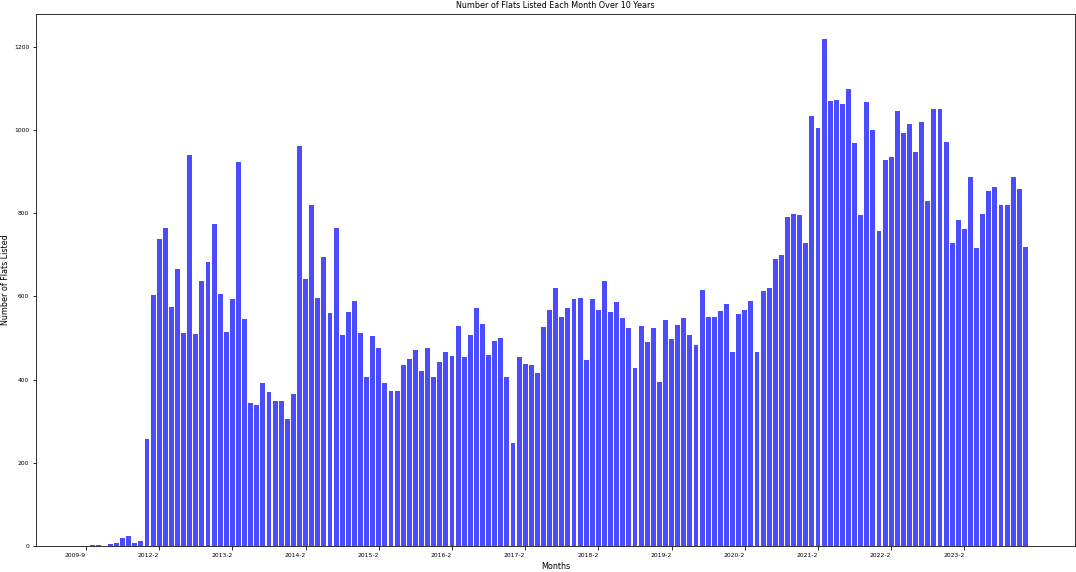

In [33]:
df['year'] = df['startdate'].str[:4] 
df["month"] = pd.DatetimeIndex(df['startdate']).month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

plt.figure(figsize=(15, 8))
plt.bar(monthly_counts.index, monthly_counts['count'], color='blue', alpha=0.7)

plt.title('Number of Flats Listed Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Number of Flats Listed')

tick_positions = monthly_counts.index[::12] 
tick_labels = [f"{year}-{month}" for year, month in zip(monthly_counts['year'][tick_positions], monthly_counts['month'][tick_positions])]
plt.xticks(tick_positions, tick_labels, ha='right')

plt.show()

#kde=True
# sns.histplot(data=df, x="startdate",bins=12)
# plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


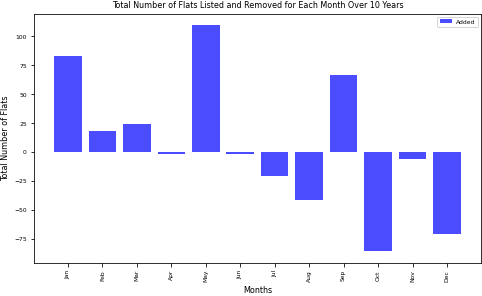

,month,total_count,difference
0,1,917,83
1,2,886,18
2,3,901,24
3,4,859,-2
4,5,917,110
5,6,815,-2
6,7,1007,-21
7,8,770,-42
8,9,905,67
9,10,889,-86


In [75]:
df['year'] = df['startdate'].str[:4] 
df["month"] = pd.DatetimeIndex(df['startdate']).month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')
monthly_counts_summed = monthly_counts.groupby('month')['count'].sum().reset_index(name='total_count')

df['year_removed'] = df['enddate'].str[:4]
df["month_removed"] = pd.DatetimeIndex(df['enddate']).month
monthly_removed_counts = df.groupby(['year_removed', 'month_removed']).size().reset_index(name='removed_count')
monthly_removed_counts_summed = monthly_removed_counts.groupby('month_removed')['removed_count'].sum().reset_index(name='total_removed_count')

difference = monthly_counts_summed.copy()
difference['difference'] = monthly_counts_summed['total_count'] - monthly_removed_counts_summed['total_removed_count']

plt.rcParams.update(bundles.icml2022(column='full', nrows=2, ncols=2, usetex=False))
fig, axs = plt.subplots(1, 1)

#plt.figure(figsize=(15, 8))
plt.bar(difference['month'], difference['difference'], color='blue', alpha=0.7, label='Added')

plt.title('Total Number of Flats Listed and Removed for Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Total Number of Flats')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(difference['month'], month_names, rotation='vertical')
plt.legend()
plt.show()

difference


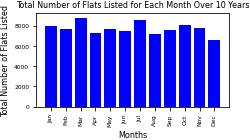

In [35]:
df['year'] = df['startdate'].str[:4] 
df["month"] = pd.DatetimeIndex(df['startdate']).month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

monthly_counts_summed = monthly_counts.groupby('month')['count'].sum().reset_index(name='total_count')

plt.rcParams.update(bundles.icml2022(column='half', nrows=2, ncols=2, usetex=False))
fig, axs = plt.subplots(1, 1)

#plt.figure(figsize=(15, 8))
plt.bar(monthly_counts_summed['month'], monthly_counts_summed['total_count'], color='blue')

plt.title('Total Number of Flats Listed for Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Total Number of Flats Listed')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_counts_summed['month'], month_names, rotation='vertical')

plt.show()

## In welchen Monaten werden Inserate am öftesten rausgenommen?

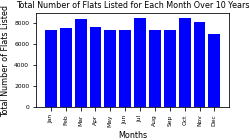

In [36]:
df['year'] = df['enddate'].str[:4] 
df["month"] = pd.DatetimeIndex(df['enddate']).month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

monthly_counts_summed = monthly_counts.groupby('month')['count'].sum().reset_index(name='total_count')

#plt.figure(figsize=(15, 8))
plt.bar(monthly_counts_summed['month'], monthly_counts_summed['total_count'], color='blue')

plt.title('Total Number of Flats Listed for Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Total Number of Flats Listed')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_counts_summed['month'], month_names, rotation='vertical')

plt.show()

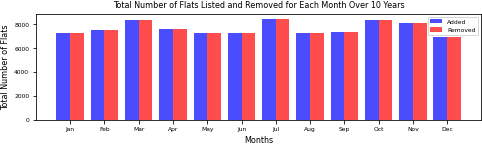

In [37]:
months = monthly_counts_summed['month']
bar_width = 0.4
bar_positions_added = months - bar_width/2
bar_positions_removed = months + bar_width/2

plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))
fig, axs = plt.subplots(1, 1)

plt.bar(bar_positions_added, monthly_counts_summed['total_count'], width=bar_width, color='blue', alpha=0.7, label='Added')
plt.bar(bar_positions_removed, monthly_removed_counts_summed['total_removed_count'], width=bar_width, color='red', alpha=0.7, label='Removed')

plt.title('Total Number of Flats Listed and Removed for Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Total Number of Flats')
plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()
plt.show()

## Welche Inserate bleiben wie lange drin?

       startdate    enddate  duration_days
1     2023-12-31 2024-01-07              7
21    2023-12-30 2023-12-31              1
27    2023-12-30 2024-01-04              5
28    2023-12-30 2024-01-01              2
36    2023-12-29 2024-01-05              7
...          ...        ...            ...
92547 2011-03-16 2012-01-05            295
92548 2011-02-18 2012-12-23            674
92549 2011-02-11 2012-01-19            342
92550 2011-02-11 2012-12-30            688
92551 2009-09-02 2014-05-15           1716

[91812 rows x 3 columns]


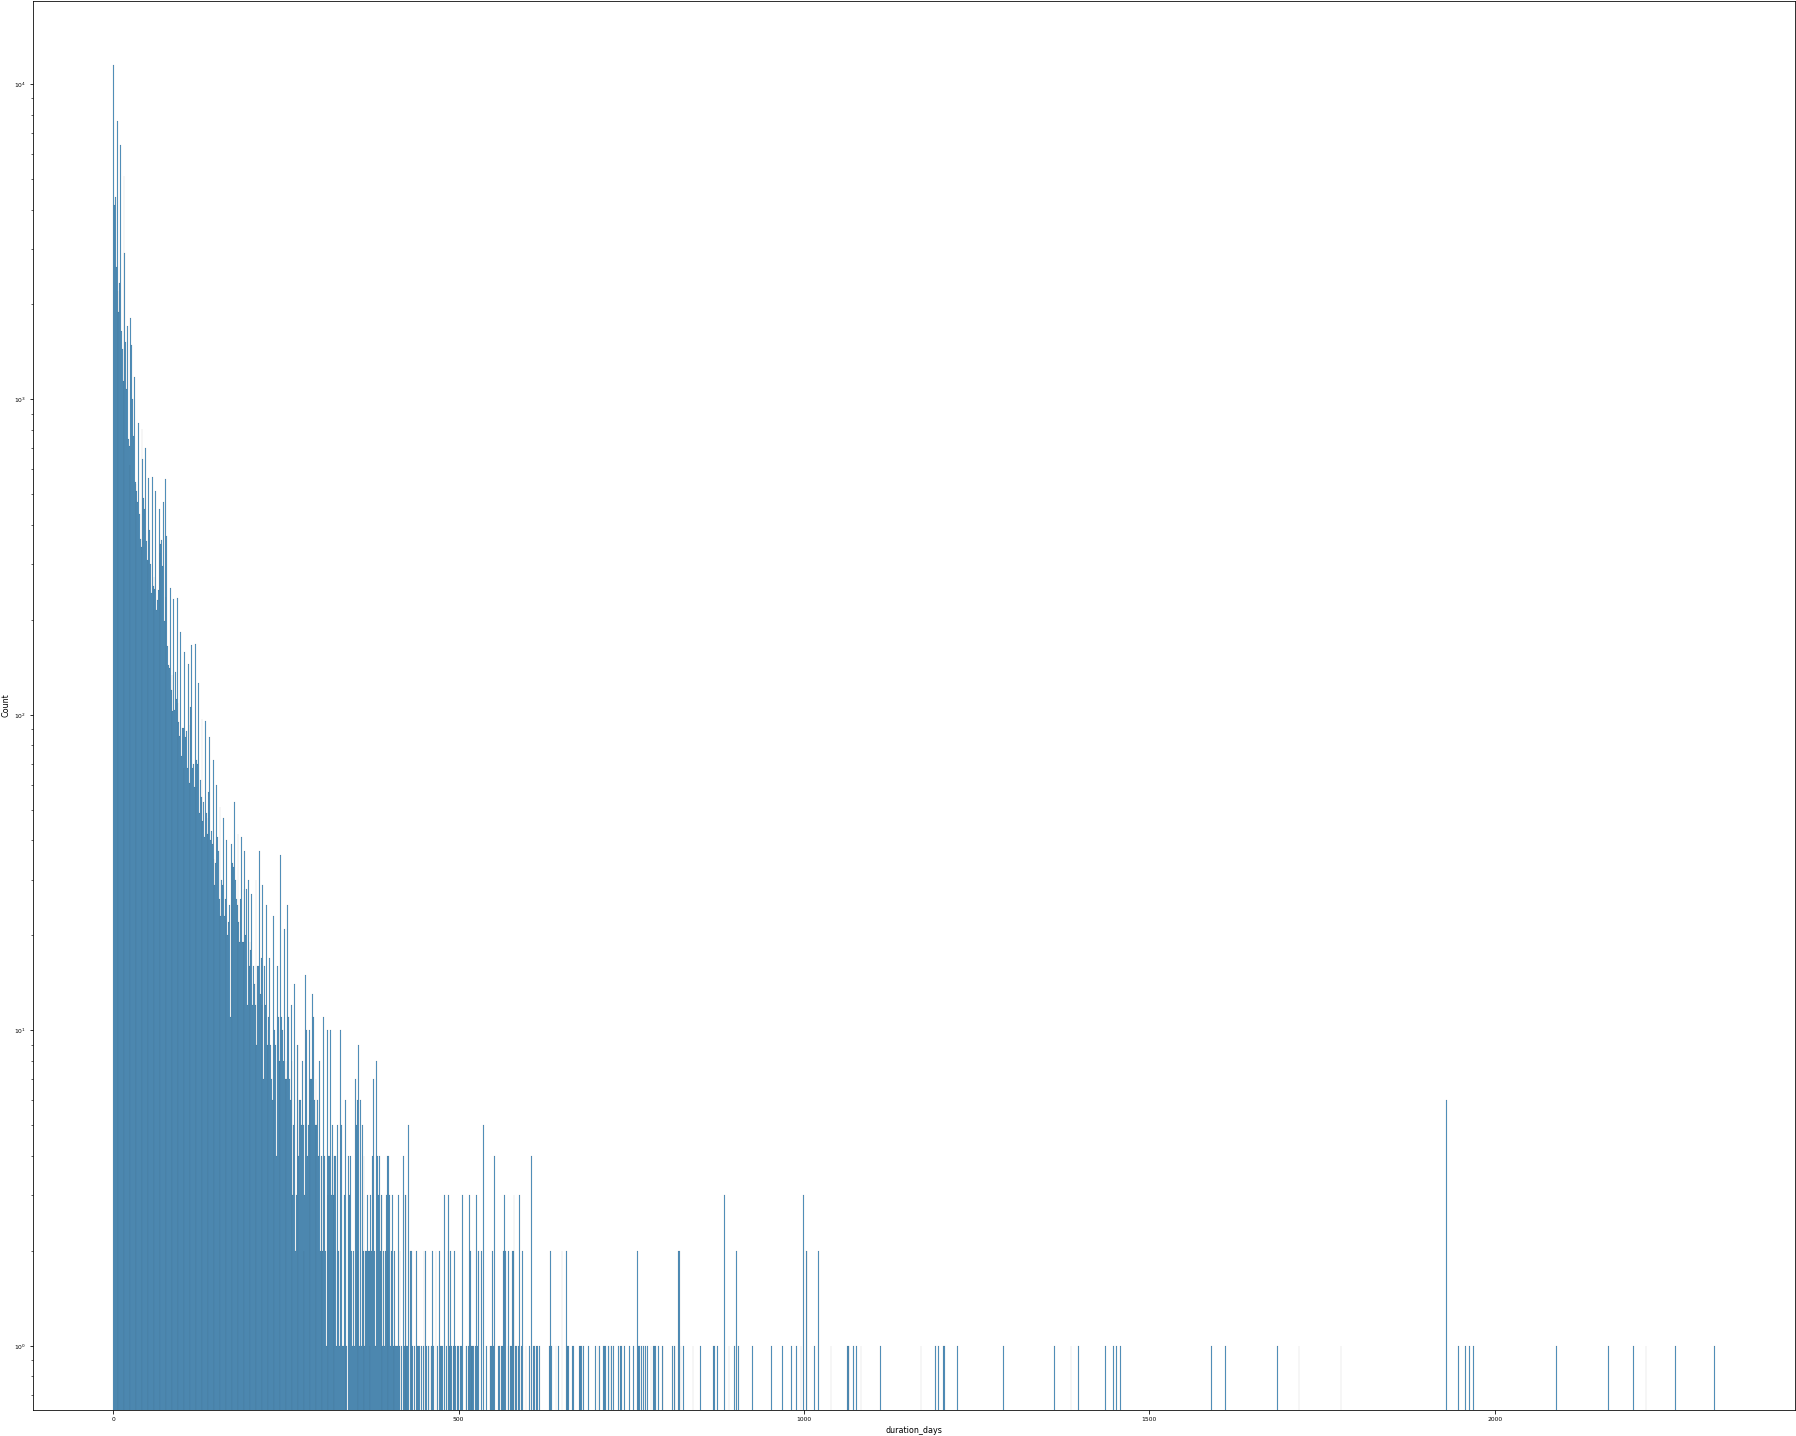

In [38]:
df= df.dropna(subset=['startdate', 'enddate'])

df['startdate'] = pd.to_datetime(df['startdate'])
df['enddate'] = pd.to_datetime(df['enddate'])

df['duration'] = df['enddate'] - df['startdate']
df['duration_days'] = df['duration'].dt.days

print(df[['startdate', 'enddate', 'duration_days']])
plt.subplots(figsize=(25, 20))
sns.histplot(data=df, x="duration_days")
plt.yscale('log')